In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("model.csv")
df.shape

(69477, 4)

In [3]:
df.head(5)

,Date,Label,Tweet,Twitter Link
0,5/3/20,clickbait,Trump removes US from global initiative to dev...,link
1,5/3/20,clickbait,"Because when lives are at stake, why cooperate...",link
2,5/3/20,clickbait,‘Once Upon a Virus’: China mocks U.S. coronavi...,link
3,5/3/20,clickbait,Trump Now Claims He Hopes U.S. Loses Less Than...,link
4,5/3/20,clickbait,Trump Spends His Morning Retweeting A Sex Ther...,link


In [4]:
df = df.drop_duplicates(subset=['Tweet'])
df.shape

(63693, 4)

In [5]:
df['text_new'] = df['Tweet'].str.split('https').str[0]
df['url'] = 'https'+df['Tweet'].str.split('https').str[1]

In [6]:
df = df.loc[~df['text_new'].isna()]

In [7]:
df['text_new'].isnull().sum()

0

In [8]:
text=df['text_new'].values
text.shape

(63692,)

In [ ]:
df.head()

,Date,Label,Tweet,Twitter Link,text_new,url
0,5/3/20,clickbait,Trump removes US from global initiative to dev...,link,Trump removes US from global initiative to dev...,https://t.co/nwkkokPZ2P
1,5/3/20,clickbait,"Because when lives are at stake, why cooperate...",link,"Because when lives are at stake, why cooperate...",https://t.co/9W285E01e2
2,5/3/20,clickbait,‘Once Upon a Virus’: China mocks U.S. coronavi...,link,‘Once Upon a Virus’: China mocks U.S. coronavi...,https://t.co/Wshscjl9qW
3,5/3/20,clickbait,Trump Now Claims He Hopes U.S. Loses Less Than...,link,Trump Now Claims He Hopes U.S. Loses Less Than...,https://t.co/c5NrFtqY1T
4,5/3/20,clickbait,Trump Spends His Morning Retweeting A Sex Ther...,link,Trump Spends His Morning Retweeting A Sex Ther...,https://t.co/vKU0H9YcD4 via @politicususa


## RAJCODE

In [ ]:
#from nltk.corpus import stopwords 
#from nltk.tokenize import word_tokenize 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def remove_stop_words(x):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(x) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]   
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return " ".join(filtered_sentence)

In [10]:
df['text_clean_1'] = df['text_new'].str.lower().apply(lambda x: remove_stop_words(x) if pd.notnull(x) else np.nan)

In [11]:
df['text_clean_2'] = df['text_clean_1'].str.replace('(:|,|\'|\"|‘)',"",regex = True)

In [ ]:
df.head()

,Date,Label,Tweet,Twitter Link,text_new,url,text_clean_1,text_clean_2
0,5/3/20,clickbait,Trump removes US from global initiative to dev...,link,Trump removes US from global initiative to dev...,https://t.co/nwkkokPZ2P,trump removes us global initiative develop cor...,trump removes us global initiative develop cor...
1,5/3/20,clickbait,"Because when lives are at stake, why cooperate...",link,"Because when lives are at stake, why cooperate...",https://t.co/9W285E01e2,"lives stake , cooperate others ?",lives stake cooperate others ?
2,5/3/20,clickbait,‘Once Upon a Virus’: China mocks U.S. coronavi...,link,‘Once Upon a Virus’: China mocks U.S. coronavi...,https://t.co/Wshscjl9qW,‘ upon virus ’ : china mocks u.s. coronavirus ...,upon virus ’ china mocks u.s. coronavirus re...
3,5/3/20,clickbait,Trump Now Claims He Hopes U.S. Loses Less Than...,link,Trump Now Claims He Hopes U.S. Loses Less Than...,https://t.co/c5NrFtqY1T,"trump claims hopes u.s. loses less 100,000 cor...",trump claims hopes u.s. loses less 100000 coro...
4,5/3/20,clickbait,Trump Spends His Morning Retweeting A Sex Ther...,link,Trump Spends His Morning Retweeting A Sex Ther...,https://t.co/vKU0H9YcD4 via @politicususa,trump spends morning retweeting sex therapist ...,trump spends morning retweeting sex therapist ...


text_clean=[]
for i,j in df_clickbait.iterrows():
    print(df_clickbait.iloc[i]["text_new"])

In [12]:
df['text_length'] = df['text_clean_2'].apply(lambda x: len(x))

In [ ]:
df['text_clean_2']

0        trump removes us global initiative develop cor...
1                          lives stake  cooperate others ?
2         upon virus ’  china mocks u.s. coronavirus re...
3        trump claims hopes u.s. loses less 100000 coro...
4        trump spends morning retweeting sex therapist ...
                               ...                        
69472    wow ! dr. fauci cheered hydroxychloroquine suc...
69473                                         leadership .
69474    ’ plain obvious left love ! ! hypocrite hates ...
69475    @ nateboesken @ therightmelissa @ realdonaldtr...
69476    india bans exports “ game-changer ” hydroxycho...
Name: text_clean_2, Length: 63692, dtype: object

In [14]:
y=df['Label'].values
X=df[['text_clean_2']].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50953, 1) (50953,) (12739, 1) (12739,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Unigram + bigram term frequency vectorizer, set minimum document frequency to 5
gram12_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', ngram_range=(1,2),lowercase=False,token_pattern='[a-zA-Z0-9]{3,}',stop_words = 'english',min_df=5,max_df=0.8,use_idf=True)

In [ ]:
X_train_idf_bi = gram12_tfidf_vectorizer.fit_transform(X_train)
X_test_idf_bi = gram12_tfidf_vectorizer.transform(X_test)

TypeError: cannot use a string pattern on a bytes-like object

In [ ]:
# import the MNB module
from sklearn.naive_bayes import BernoulliNB

# initialize the bernoulli model
bb_clf= BernoulliNB()

In [ ]:
#bigram
bb_clf_bi = bb_clf.fit(X_train_idf_bi,y_train)
bb_clf_bi.score(X_test_idf_bi,y_test)

0.8702409922285894

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = bb_clf.fit(X_train_idf_bi,y_train).predict(X_test_idf_bi)
from sklearn.metrics import classification_report
target_names = ['clickbait','NotClickbait']
print("\nclassification report:\n ",classification_report(y_test, y_pred, target_names=target_names))

NameError: name 'bb_clf' is not defined

In [ ]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1)

# use the training data to train the model
#unigram
svm_clf = svm_clf.fit(X_train_idf_bi,y_train)
svm_clf.score(X_test_idf_bi,y_test)

0.8933197268231415

In [ ]:
y_pred = svm_clf.fit(X_train_idf_bi,y_train).predict(X_test_idf_bi)
from sklearn.metrics import classification_report
target_names = ['clickbait','NotClickbait']
print("\nclassification report:\n ",classification_report(y_test, y_pred, target_names=target_names))


classification report:
                precision    recall  f1-score   support

   clickbait       0.89      0.91      0.90      6821
NotClickbait       0.89      0.87      0.88      5918

    accuracy                           0.89     12739
   macro avg       0.89      0.89      0.89     12739
weighted avg       0.89      0.89      0.89     12739



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[6202  619]
 [ 740 5178]]


In [ ]:
y_pred

array(['Notclickbait', 'clickbait', 'clickbait', ..., 'Notclickbait',
       'Notclickbait', 'Notclickbait'], dtype=object)

In [ ]:
# Your code starts here
print("clickbait examples were mistakenly predicted as NotClickbait\n")
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=='clickbait' and y_pred[i]=='Notclickbait'):
        print(X_test[i])
        err_cnt = err_cnt+1
print("\nerrors:", err_cnt)

print("\nNotClickbait examples were mistakenly predicted as Clickbait\n")
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=='Notclickbait' and y_pred[i]=='clickbait'):
        print(X_test[i])
        err_cnt = err_cnt+1
print("\nerrors:", err_cnt)

clickbait examples were mistakenly predicted as NotClickbait


stuck home coronavirus pandemic ? 7 best comedy movies watch
•police arrest re-open america advocates ...
commie china threatened eu ramifications report criticized beijing coronavirus disinformation efforts comes ... eu caved commie chinas pressure & water report . # communistvirus # chinaliedpeopledie
okay
nbc  cnn  msnbc blame trump coronavirus  people died “ donald trump president ”
antisemitic democrats islamist rep. ilhan omar socialist friends demand islamist iran sanctions gone kill jews wuhan china corona virus
trump admin opening cases federal court get border wall completed need ever two reasons  • controlling disease-ridden foreign invasion • u.s. citizens need first dibs job openings # buildthewall
watch  putin explains tax rich pay coronavirus problems
coronavirus conspiracy theories fake videos fueling rise racism  research
follow money . # qanon
🇺🇸 state department puts cap chinese citizens employed china-ba

In [ ]:
df_clickbait=df[df["Label"]=="clickbait"]
df_clickbait.head()

,Date,Label,Tweet,Twitter Link,text_new,text_clean_1,text_clean_2
0,5/3/20,clickbait,Trump removes US from global initiative to dev...,link,Trump removes US from global initiative to dev...,trump removes us global initiative develop cor...,trump removes us global initiative develop cor...
1,5/3/20,clickbait,"Because when lives are at stake, why cooperate...",link,"Because when lives are at stake, why cooperate...","lives stake , cooperate others ?",lives stake cooperate others ?
2,5/3/20,clickbait,‘Once Upon a Virus’: China mocks U.S. coronavi...,link,‘Once Upon a Virus’: China mocks U.S. coronavi...,‘ upon virus ’ : china mocks u.s. coronavirus ...,upon virus ’ china mocks u.s. coronavirus re...
3,5/3/20,clickbait,Trump Now Claims He Hopes U.S. Loses Less Than...,link,Trump Now Claims He Hopes U.S. Loses Less Than...,"trump claims hopes u.s. loses less 100,000 cor...",trump claims hopes u.s. loses less 100000 coro...
4,5/3/20,clickbait,Trump Spends His Morning Retweeting A Sex Ther...,link,Trump Spends His Morning Retweeting A Sex Ther...,trump spends morning retweeting sex therapist ...,trump spends morning retweeting sex therapist ...


In [ ]:
def pre(docs):
    docs =  docs.lower()
    docs = re.sub(r'\d+','',docs)
    return docs
vectorizer = TfidfVectorizer(max_df=0.65, min_df=5, stop_words='english', use_idf=True, norm=None,token_pattern='[a-zA-Z0-9]{3,}',preprocessor = pre, ngram_range=(1,2))
transformed_documents = vectorizer.fit_transform(df_clickbait['text_clean_2'])

In [ ]:
transformed_documents_as_array = transformed_documents.toarray()
# use this line of code to verify that the numpy array represents the same number of documents that we have in the file list
len(transformed_documents_as_array)

30174

In [ ]:

for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

In [ ]:
one_doc_as_df.head(10)

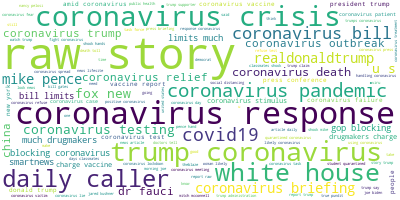

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_clickbait['text_clean_2'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


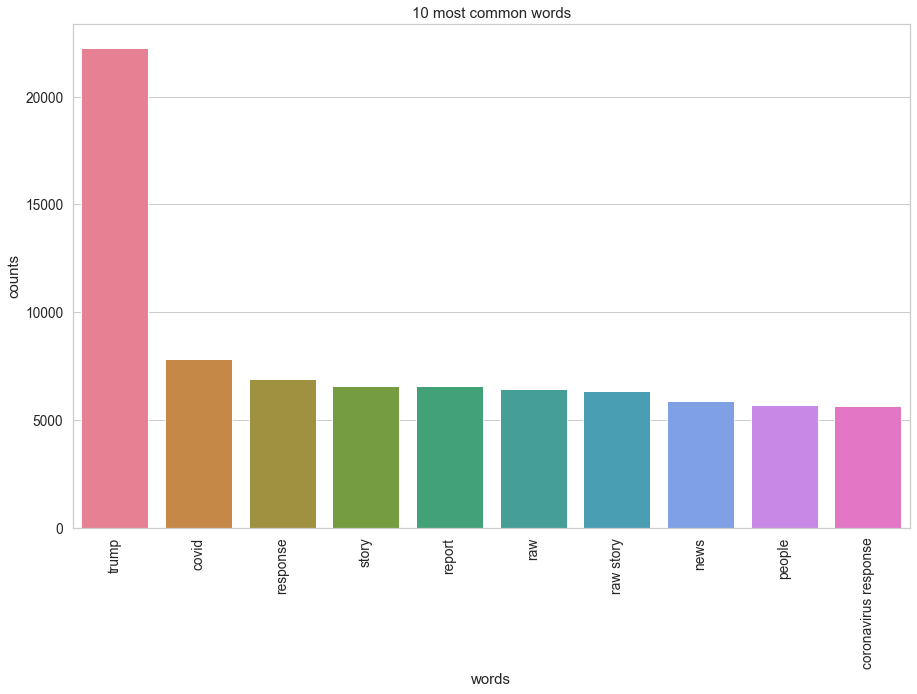

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, vectorizer):
    import matplotlib.pyplot as plt
    words = vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
# Visualise the 10 most common words
plot_10_most_common_words(transformed_documents, vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(transformed_documents_as_array)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vectorizer, number_words)

Topics found via LDA:

Topic #0:
trump mike pence mike pence quarantined china student shook quarantined coronavirus covid

Topic #1:
trump response coronavirus response article house woman white florida white house look

Topic #2:
trump crisis says coronavirus crisis republicans testing covid raw story raw story

Topic #3:
trump news pandemic people covid stimulus america president fox pelosi

Topic #4:
trump vaccine report new covid blocking gop charge blocking coronavirus gop blocking


# BERT

In [2]:
!pip install transformers

     |████████████████████████████████| 1.3MB 23.1MB/s 
     |████████████████████████████████| 2.9MB 29.5MB/s 
     |████████████████████████████████| 890kB 35.1MB/s 
     |████████████████████████████████| 1.1MB 51.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=170321e9551c2bd68fcf1744ce5c8c5ac5cfe981e29392f03d4307cb8e6c375c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [17]:

import torch

# Preliminaries

from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models

import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification

# Training

import torch.optim as optim

# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


ModuleNotFoundError: No module named 'torch'

In [ ]:
df1 = df.copy()

In [18]:
import gc

In [19]:
gc.collect()

186

In [ ]:
df.head()

,Date,Label,Tweet,Twitter Link,text_new,url,text_clean_1,text_clean_2,text_length
0,5/3/20,clickbait,Trump removes US from global initiative to dev...,link,Trump removes US from global initiative to dev...,https://t.co/nwkkokPZ2P,trump removes us global initiative develop cor...,trump removes us global initiative develop cor...,74
1,5/3/20,clickbait,"Because when lives are at stake, why cooperate...",link,"Because when lives are at stake, why cooperate...",https://t.co/9W285E01e2,"lives stake , cooperate others ?",lives stake cooperate others ?,31
2,5/3/20,clickbait,‘Once Upon a Virus’: China mocks U.S. coronavi...,link,‘Once Upon a Virus’: China mocks U.S. coronavi...,https://t.co/Wshscjl9qW,‘ upon virus ’ : china mocks u.s. coronavirus ...,upon virus ’ china mocks u.s. coronavirus re...,72
3,5/3/20,clickbait,Trump Now Claims He Hopes U.S. Loses Less Than...,link,Trump Now Claims He Hopes U.S. Loses Less Than...,https://t.co/c5NrFtqY1T,"trump claims hopes u.s. loses less 100,000 cor...",trump claims hopes u.s. loses less 100000 coro...,53
4,5/3/20,clickbait,Trump Spends His Morning Retweeting A Sex Ther...,link,Trump Spends His Morning Retweeting A Sex Ther...,https://t.co/vKU0H9YcD4 via @politicususa,trump spends morning retweeting sex therapist ...,trump spends morning retweeting sex therapist ...,77


In [ ]:
df['url'] = df['url'].fillna('no_url')

In [ ]:
df = df.loc[~df['text_clean_2'].str.contains('^$')]

In [ ]:
first_n_words = 200
def trim_string(x):

    x = x.split(maxsplit=first_n_words)
    x = ' '.join(x[:first_n_words])

    return x

# Prepare columns
df['Label'] = (df['Label'] == 'clickbait').astype('int')
#df['titletext'] = df['title'] + ". " + df['text']

# Trim text and titletext to first_n_words
df['text_clean_3'] = df['text_clean_2'].apply(trim_string)
# Drop rows with empty text
df.drop(df[df['text_clean_3'].str.len() < 5].index, inplace=True)

In [ ]:
df['text_clean_3'] = df['text_clean_2'].str.replace('[^A-Z a-z0-9]+', '', regex = True)

In [ ]:
df.shape

(63071, 10)

In [ ]:
df.head()

,Date,Label,Tweet,Twitter Link,text_new,url,text_clean_1,text_clean_2,text_length,text_clean_3
0,5/3/20,1,Trump removes US from global initiative to dev...,link,Trump removes US from global initiative to dev...,https://t.co/nwkkokPZ2P,trump removes us global initiative develop cor...,trump removes us global initiative develop cor...,74,trump removes us global initiative develop cor...
1,5/3/20,1,"Because when lives are at stake, why cooperate...",link,"Because when lives are at stake, why cooperate...",https://t.co/9W285E01e2,"lives stake , cooperate others ?",lives stake cooperate others ?,31,lives stake cooperate others
2,5/3/20,1,‘Once Upon a Virus’: China mocks U.S. coronavi...,link,‘Once Upon a Virus’: China mocks U.S. coronavi...,https://t.co/Wshscjl9qW,‘ upon virus ’ : china mocks u.s. coronavirus ...,upon virus ’ china mocks u.s. coronavirus re...,72,upon virus china mocks us coronavirus respo...
3,5/3/20,1,Trump Now Claims He Hopes U.S. Loses Less Than...,link,Trump Now Claims He Hopes U.S. Loses Less Than...,https://t.co/c5NrFtqY1T,"trump claims hopes u.s. loses less 100,000 cor...",trump claims hopes u.s. loses less 100000 coro...,53,trump claims hopes us loses less 100000 corona...
4,5/3/20,1,Trump Spends His Morning Retweeting A Sex Ther...,link,Trump Spends His Morning Retweeting A Sex Ther...,https://t.co/vKU0H9YcD4 via @politicususa,trump spends morning retweeting sex therapist ...,trump spends morning retweeting sex therapist ...,77,trump spends morning retweeting sex therapist ...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['text_clean_3']], df['Label'], test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
X_train['Label'] = y_train
X_val['Label'] = y_val
X_test['Label'] = y_test

In [ ]:
X_train.isna().sum()

text_clean_3    0
Label           0
dtype: int64

In [ ]:
X_train.reset_index(drop = True).to_csv('train.csv')
X_val.to_csv('valid.csv')
X_test.to_csv('test.csv')

In [ ]:
pd.read_csv('train.csv').head()

,text_clean_3,Label
0,niall mccrae wet market source coronavirus li...,0
1,florida judge revokes child custody motherwho ...,0
2,mcconnell shoots additional coronavirus relief...,1
3,2 strains virus apparently,0
4,the serial lies,0


In [24]:
gc.collect()

6916

In [25]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Model parameter
MAX_SEQ_LEN = 128
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Fields

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('text_clean_3', text_field) ,('Label', label_field)]

# TabularDataset

train, valid, test = TabularDataset.splits(path='.', train='train.csv', validation='valid.csv',
                                           test='test.csv', format='CSV', fields=fields, skip_header=True)


In [26]:
# Iterators
device = torch.device('cuda')
train_iter = BucketIterator(train, batch_size=16, sort_key=lambda x: len(x.text_clean_3),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=16, sort_key=lambda x: len(x.text_clean_3),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=16, device=device, train=False, shuffle=False, sort=False)

In [27]:
class BERT(nn.Module):
    def __init__(self):
        super(BERT, self).__init__()

        options_name = "bert-base-uncased"
        self.encoder = BertForSequenceClassification.from_pretrained(options_name)

    def forward(self, text, label):
        loss, text_feat = self.encoder(text, labels=label)[:2]

        return loss, text_feat

In [28]:
# Save and Load Functions

def save_checkpoint(save_path, model, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    
    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [29]:
# Training Function

def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 5,
          eval_every = len(train_iter) // 2,
          file_path = '.',
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        for (text_clean_3, Label), _ in train_loader:
            Label = Label.type(torch.LongTensor)           
            Label = Label.to(device)
            text_clean_3 = text_clean_3.type(torch.LongTensor)  
            text_clean_3 = text_clean_3.to(device)
            output = model(text_clean_3,Label)
            loss, _ = output

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validation loop
                    for (text_clean_3, Label), _ in valid_loader:
                        Label = Label.type(torch.LongTensor)           
                        Label = Label.to(device)
                        text_clean_3 = text_clean_3.type(torch.LongTensor)  
                        text_clean_3 = text_clean_3.to(device)
                        output = model(text_clean_3,Label)
                        loss, _ = output
                        
                        valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
                    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')

In [11]:
gc.collect()

814

In [12]:
model = BERT().to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)

train(model=model, optimizer=optimizer)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch [1/5], Step [1183/11830], Train Loss: 0.4670, Valid Loss: 0.4316
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [1/5], Step [2366/11830], Train Loss: 0.3455, Valid Loss: 0.3956
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [2/5], Step [3549/11830], Train Loss: 0.2779, Valid Loss: 0.3815
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [2/5], Step [4732/11830], Train Loss: 0.1958, Valid Loss: 0.3338
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [3/5], Step [5915/11830], Train Loss: 0.1731, Valid Loss: 0.3807
Epoch [3/5], Step [7098/11830], Train Loss: 0.1121, Valid Loss: 0.3782
Epoch [4/5], Step [8281/11830], Train Loss: 0.1130, Valid Loss: 0.3783
Epoch [4/5], Step [9464/11830], Train Loss: 0.0755, Valid Loss: 0.4092
Epoch [5/5], Step [10647/11830], Train Loss: 0.0773, Valid Loss: 0.4172


KeyboardInterrupt: ignored

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Model loaded from <== ./metrics.pt


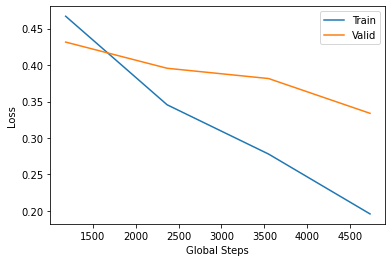

In [16]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics('.' + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [22]:
# Evaluation Function

def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for (text_clean_3, Label), _ in test_loader:

                Label = Label.type(torch.LongTensor)           
                Label = Label.to(device)
                text_clean_3 = text_clean_3.type(torch.LongTensor)  
                text_clean_3 = text_clean_3.to(device)
                output = model(text_clean_3, Label)

                _, output = output
                y_pred.extend(torch.argmax(output, 1).tolist())
                y_true.extend(Label.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['Clickbait', 'Not Clickbait'])
    ax.yaxis.set_ticklabels(['Clickbait', 'Not Clickbait'])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Model loaded from <== ./model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.9000    0.8473    0.8729      6170
           0     0.8616    0.9099    0.8851      6445

    accuracy                         0.8793     12615
   macro avg     0.8808    0.8786    0.8790     12615
weighted avg     0.8804    0.8793    0.8791     12615



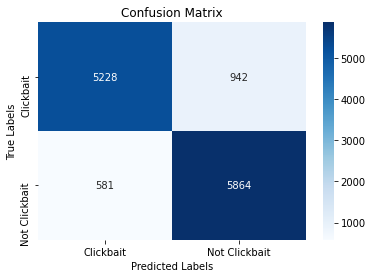

In [30]:
best_model = BERT().to(device)

load_checkpoint('.' + '/model.pt', best_model)

evaluate(best_model, test_iter)

In [ ]:
X_train.sort_values('text_clean_3').head()

,text_clean_3,Label
7591,,0
63197,,0
31745,,0
18165,snapchat teen vog...,0
56407,dems demand trump stop building borde...,0


In [ ]:
X_train.loc[X_train['text_clean_3'] == 'hannity freaks holding trump accountable coronavirus death toll']

,text_clean_3,Label
196,hannity freaks holding trump accountable coron...,1
258,hannity freaks holding trump accountable coron...,1
241,hannity freaks holding trump accountable coron...,1


'1.3.1'

In [ ]:
# Your code starts here
print("clickbait examples were mistakenly predicted as NotClickbait\n")
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=='clickbait' and y_pred[i]=='Notclickbait'):
        print(X_test[i])
        err_cnt = err_cnt+1
print("\nerrors:", err_cnt)

print("\nNotClickbait examples were mistakenly predicted as Clickbait\n")
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=='Notclickbait' and y_pred[i]=='clickbait'):
        print(X_test[i])
        err_cnt = err_cnt+1
print("\nerrors:", err_cnt)